In [125]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


In [126]:
df=pd.read_csv("Cleaned_data.csv")

In [127]:
X = df.drop('Student', axis=1)
y = df['Student']
 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (240, 12) (240,)
Testing set shape: (61, 12) (61,)


In [128]:
X_train

,Unnamed: 0.1,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Married,Ethnicity,Balance
261,349,350,0.221745,0.326936,0.332958,0.250,0.640000,0.533333,1,1,1.0,0.251626
105,145,146,0.053227,0.290704,0.278965,0.125,0.373333,0.600000,0,0,1.0,0.321161
51,68,69,0.101483,0.363322,0.365579,0.125,0.733333,0.666667,1,1,0.0,0.411206
290,387,388,0.035823,0.036156,0.037120,0.250,0.520000,0.266667,0,0,1.0,0.000000
145,202,203,0.061982,0.043141,0.058493,0.125,0.466667,0.533333,1,1,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
96,125,126,0.099922,0.126276,0.114736,0.000,0.146667,0.666667,1,1,0.0,0.000000
59,77,78,0.061390,0.181776,0.179978,0.000,0.093333,0.666667,1,0,1.0,0.072536
173,239,240,0.102092,0.205036,0.191226,0.000,0.160000,0.533333,1,1,1.0,0.081541
241,324,325,0.119943,0.151762,0.146232,0.125,0.573333,0.800000,0,1,1.0,0.207604


In [129]:
nbc=GaussianNB()
nbc.fit(X_train,y_train)

GaussianNB()

In [130]:

y1_pred =nbc.predict(X_test)
print(classification_report(y_test, y1_pred))
print(confusion_matrix(y_test, y1_pred))  

              precision    recall  f1-score   support

           0       0.93      0.96      0.95        57
           1       0.00      0.00      0.00         4

    accuracy                           0.90        61
   macro avg       0.47      0.48      0.47        61
weighted avg       0.87      0.90      0.89        61

[[55  2]
 [ 4  0]]


In [131]:
accuracy1 = accuracy_score(y_test, y1_pred)       # accuracy:the ratio of correctly classified samples to the total number of samples.
print("Accuracy:", accuracy1)    
  

Accuracy: 0.9016393442622951


In [132]:
dtc = DecisionTreeClassifier()

# Train the model
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [133]:
y2_pred = dtc.predict(X_test)
print(classification_report(y_test, y2_pred))
print(confusion_matrix(y_test, y2_pred))


              precision    recall  f1-score   support

           0       0.93      0.93      0.93        57
           1       0.00      0.00      0.00         4

    accuracy                           0.87        61
   macro avg       0.46      0.46      0.46        61
weighted avg       0.87      0.87      0.87        61

[[53  4]
 [ 4  0]]


In [134]:
accuracy2 = accuracy_score(y_test, y2_pred)
print(f'Accuracy: {accuracy2}')

Accuracy: 0.8688524590163934


In [135]:
knn = KNeighborsClassifier(n_neighbors=6)  
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [136]:
y3_pred = knn.predict(X_test)
print(classification_report(y_test, y3_pred, zero_division=1))
print(confusion_matrix(y_test, y3_pred))


              precision    recall  f1-score   support

           0       0.93      1.00      0.97        57
           1       1.00      0.00      0.00         4

    accuracy                           0.93        61
   macro avg       0.97      0.50      0.48        61
weighted avg       0.94      0.93      0.90        61

[[57  0]
 [ 4  0]]


In [137]:
accuracy3 = accuracy_score(y_test, y3_pred)
print(f'Accuracy: {accuracy3}')

Accuracy: 0.9344262295081968


In [138]:
results = pd.DataFrame({'Algorithm': ['Naive Bayes', 'Decision Tree', 'KNN'],
                       'Accuracy': [ 0.9016393442622951,0.8852459016393442,  0.9344262295081968]})

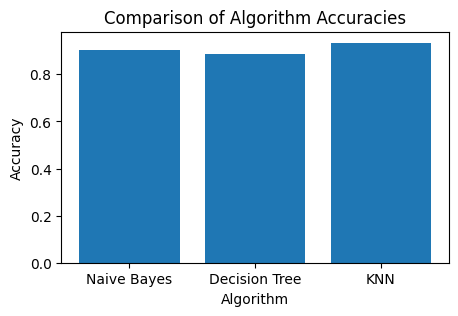

In [139]:
plt.figure(figsize=(5, 3))
bar_width=0.2
plt.bar(results['Algorithm'], results['Accuracy'])
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Comparison of Algorithm Accuracies')
plt.show()